# Aufgabenblatt 10

<p style="background-color:#f6f6f6;border-left:5px solid red;padding:0.6em;box-sizing:border-box;">
<strong>Lernziele:</strong><br/>
    In dieser Übung analysieren wir gebene Daten und versuchen die Parameter eines Modells zu bestimmen, welches diese Daten beschreibt. Dies ist wichtig um charackteristiche Eigenschaften eines Experiments bestimmen zu können.
</p>

<p style="background-color:#f6f6f6;border-left:5px solid blue;padding:0.6em;box-sizing:border-box;">
<strong>Wichtigste neuen Funktionen für diese Übung:</strong><br/>
    Dies sind die wichtigsten Funktionen die sie während dieser Übung benötigen:<br>
    Die jeweilige Syntax beschreibt eine examplarische Verwendung. Der Funktionsname ist jeweils ein Link zur offiziellen Dokumentation, welche alle Argumente der Funktion darlegt und ihre Funktionalität beschreibt. <br>
    <b>Funktionen zur statistischen Analyse: </b><br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html">numpy.linalg.inv(...)</a> Berechnet die Inverse einer Matrix.<br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.dot.html">numpy.dot(...)</a> or alternatively A@B Diese Funktion berechnet das Matrixprodukt.<br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.histogram.html">numpy.histogram(...)</a> Berechnet das Histogram der übergebenen Daten. Dabei hält es sich an die übergebenen Ränder der Buckets.<br>
    <b>Funktionen zum Plotten: </b><br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.errorbar.html"> axis.errorbar(...)</a> Stellt die gegebenen Datenpunkte da, indem es den Wert sowie die angegebenen Fehlerbalken plottet.<br>
    <a href="https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pcolormesh..html"> axis.pcolormesh(...)</a> Erstellt einen 2D-Graphen, bei dem die Farbe des Graphen bei der Position X,Y im 2D-Array C übergeben wird.<br>
    <a href="https://matplotlib.org/stable/api/colorbar_api.html#module-matplotlib.colorbar"> axis.pcolormesh(...)</a> Fügt der aktuellen Figur eine Farbskala hinzu, welche den Farben im Graphen ax die numerischen Werte zuordnet.<br>
</p>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Aufgabe 1

Bei Messungen möchte man häufig die Abhängigkeit einer Messgrösse $y$ von einer unabhängigen Variable $x$ bestimmen. Zum Beispiel wenn man die Kennlinie einer Diode bestimmt, dann ist die angelegte Spannung $U$ die unabhängige Variable und man misst den Strom $I$ in Abhängigkeit davon. Wird ein polynomieller Zusammenhang von der Form:

$$y(x) = f(x, \vec{a}) = a_0 + a_1 x + a_2 x^2 + \dots = \sum_{n=0}^{m} a_n x^n \qquad \mathrm{mit}\quad \vec{a} = (a_0, \dots, a_m)$$

vermutet, dann kann man die unbekannten Parameter $a_n$ aufgrund von gemessenen Daten mittels linearem Fitten 
bestimmen.

Von nun an nennen wir das Polynom $f(x, \vec{a})$ das Modell welches uns für jedes $x$ den erwarteten Messwert gibt. Die tatsächlich gemessenen Werte nennen wir $y_i$, mit der jeweiligen Unsicherheit (Standardabweichung) $\sigma_i$.

## a)

Laden Sie den Datensatz 'lin_data.txt', der eine positionsabhängige Kraft beschreibt, und plotten Sie die Daten mit Fehlerbalken. Verwenden Sie hierzu die Funktion `ax.errorbar` von matplotlib. Schätzen Sie aufgrund des Plots von Hand die Steigung und den Achsenabschnitt der Geraden ab, die den Zusammenhang zwischen Kraft und Ort in diesem Datensatz beschreibt.

In [27]:
lin_data=np.loadtxt('lin_data.txt')
xx=lin_data[:,0]
F=lin_data[:,1]
sigma_F=lin_data[:,2]

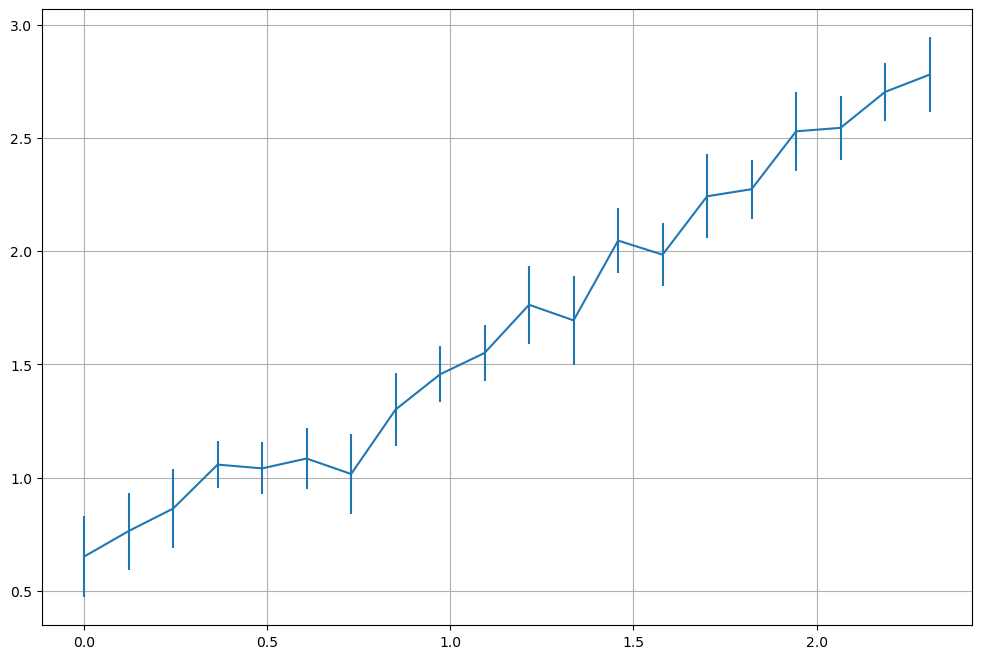

In [28]:
fig,ax=plt.subplots(1,1, figsize=(12,8))
ax.errorbar(xx,F,yerr=sigma_F)
ax.grid()

## b)

In der Vorlesung haben Sie gesehen, dass das lineare Fitten dem Minimieren der Summe aller Residuenquadrate entspricht. Das heisst man sucht die Werte für $a_n$, sodass die Summe

$$S = \sum_{n=1}^{N} \frac{(y_i - f(x_i, \vec{a}))^2}{\sigma_i^2}$$

den minimalen Wert annimmt. (Die Differenzen der Messwerte $y_i$ und der erwarteten Werte $f(x_i, \vec{a})$ heissen Residuen.)

Wie Sie im Plot aus a) gesehen haben, ist der Zusammenhang bei diesen Daten linear, d.h. wir haben $m = 1$ und das Modell ist

$$ f(x, a_0, a_1) = a_0 + a_1 x.$$

Berechnen Sie die Summe $S$ der Residuenquadrate für verschiedene Kombinationen von Werten für $a_0$ und $a_1$ in einem Bereich um die Werte, die Sie in a) von Hand abgeschätzt haben. Nehmen Sie z.B. für $a_0$ fünfzig Werte im Intervall $[-0.5, 1.5]$ und für $a_1$ sechzig Werte im Intervall $[0, 2]$ und berechnen Sie $S$ für alle $50 \times 60$ Kombinationen. 

Plotten Sie $\log(S)$ abhängig von $a_0$ und $a_1$ mithilfe von `ax.pcolormesh` als 2D-Plot. Orientieren Sie sich an dem Beispiel unten für das Erstellen des Plots. Sie sollten ein Minimum sehen, das den optimalen Werten für $a_0$ und $a_1$ entspricht. Stimmt die Position des Minimums mit den Werten, die Sie in a) erhalten haben, überein?

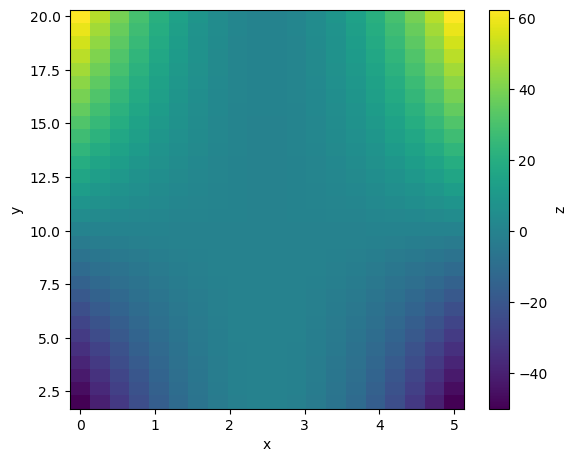

In [29]:
# Erzeuge einige Daten zum Plotten
x_example = np.linspace(0, 5, 20)
y_example = np.linspace(2, 20, 30)
z_example = np.zeros(shape=(len(x_example), len(y_example)))

for i, x in enumerate(x_example):
    for j, y in enumerate(y_example):
        z_example[i, j] = (x - 2.5)**2 * (y - 10)

        
# 2D-Plot generieren
cm = 1 / 2.54

fig = plt.figure(figsize=(15 * cm, 12 * cm))
ax = fig.add_subplot(1, 1, 1)

# Beachten Sie, dass das Z-Array transponiert werden muss (.T), weil die
# pcolormesh erwartet, dass die erste Achse (äusseres Array) den vertikalen
# Pixeln (y-Achse) enspricht und die zweite Achse (inneres Array) den horizontalen.
im = ax.pcolormesh(x_example, y_example, z_example.T, shading='nearest')

# Colorbar für die Farbskala, mit Achsenbeschriftung
fig.colorbar(im, label='z')

ax.set_xlabel('x')
ax.set_ylabel('y')

fig.tight_layout()

0.5612244897959182 0.9491525423728814


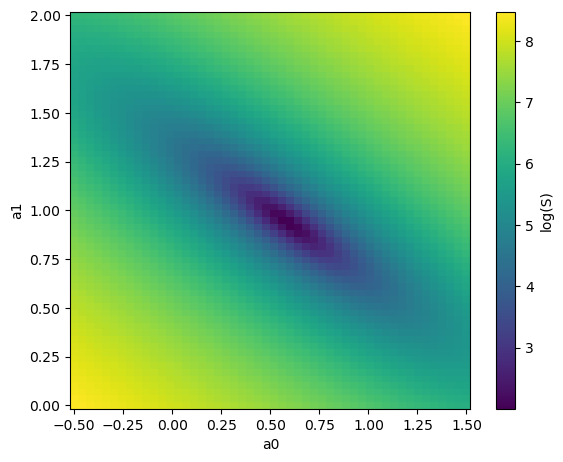

In [38]:
# Ihr Code
v_a0=np.linspace(-0.5,1.5,50)
v_a1=np.linspace(0,2,60)
S = np.zeros(shape=(len(v_a0), len(v_a1)))

for i, a0 in enumerate(v_a0):
    for j, a1 in enumerate(v_a1):
        S[i,j]= np.log(np.sum(((F - (a0 + a1*xx))/sigma_F)**2))

cm = 1 / 2.54

fig = plt.figure(figsize=(15 * cm, 12 * cm))
ax = fig.add_subplot(1, 1, 1)

im = ax.pcolormesh(v_a0, v_a1, S.T, shading='nearest')

# Colorbar für die Farbskala, mit Achsenbeschriftung
fig.colorbar(im, label='log(S)')

ax.set_xlabel('a0')
ax.set_ylabel('a1')

fig.tight_layout()

ia0,ia1 = np.unravel_index(np.argmin(S, axis=None), S.shape)
print(v_a0[ia0], v_a1[ia1])

## c)

Bestimmen Sie die optimalen Parameter $a_0$ und $a_1$ und deren Unsicherheiten mit der analytischen Methode aus der Vorlesung. Berechnen Sie dazu die Normalmatrix

$$
N = \begin{pmatrix}\sum_i w_i & \sum_i w_i x_i \\ \sum_i w_i x_i & \sum_i w_i x_i^2 \end{pmatrix}
$$

und den Vektor

$$
\vec{Y} = \begin{pmatrix} \sum_i w_i y_i \\ \sum_i w_i x_i y_i \end{pmatrix},
$$

wobei die Gewichte $w_i = 1 / \sigma_i^2$ durch die Unsicherheiten der Datenpunkte gegeben sind. Plotten Sie anschliessend die Daten zusammen mit dem Fit um Ihr Resultat zu überprüfen.

Hinweise:

- Sie können 2-dimensionale Arrays verwenden, um Matrizen zu speichern.
- Um eine Matrix zu invertieren, verwenden Sie die Funktion `np.linalg.inv`.
- Für das Matrixprodukt können Sie die Notation `A @ B` oder `np.dot(A, B)` verwenden.

[0.5795381  0.94430033]


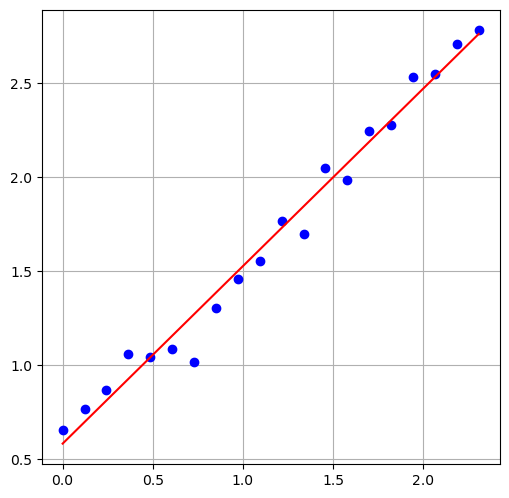

In [40]:
w=1/sigma_F
wx=np.dot(w,xx)
N=np.array(([np.sum(w), wx],[wx, np.dot(w,xx**2)]))
Y=np.array([[np.dot(w,F)],[np.sum(w*xx*F)]])
a=(np.linalg.inv(N)@Y).ravel()

print(a)

fig,ax=plt.subplots(1,1, figsize=(15*cm, 15*cm))
ax.plot(xx,F,'ob')
ax.plot(xx,a[0]+a[1]*xx, '-r')
ax.grid()

## d)

Schreiben Sie eine Funktion, die einen Datensatz mit einem Polynom beliebiger Ordnung fittet, d.h. die optimalen Parameter $a_i$ findet. Die Funktion soll als Argumente nehmen:

- Die Werte $x_i$ der unabhängigen Variable.
- Die gemessenen Werte $y_i$.
- Die dazugehörigen Unsicherheiten $\sigma_i$.
- Den Grad $m$ des Polynoms, das gefittet werden soll.

Die Rückgabewerte der Funktion sollen der Lösungsvektor $\vec{a}$, also die Koeffizienten des gefitteten Polynoms, und deren Kovarianzmatrix $C$ sein.

Wenden Sie die Funktion auf den Datensatz 'poly_data.txt' an und berechnen Sie die Fits mit $m = 4$, $m=5$ und $m=6$. Plotten Sie den Fit $f(x,\vec{a}_{\mathrm{opt}})$ und die Residuen für die drei Fälle. Was können Sie aus Ihren Plots schliessen? Können Sie zum Beispiel ahnand der Residuen erkennen, ob Ihr Modell die Daten gut beschreibt? Was passiert, wenn sie unterfitten (d.h. wenn das Modell zu wenige Freiheitsgrade hat) und wenn Sie überfitten (zu viele Freiheitsgrade)?

In [50]:
def polyfit(x,y, sigma, order):
    # make y a column vector
    y=np.reshape(y,(-1,1))
    #define X und W    
    W=np.diag(1/sigma**2)
    Xt = np.vstack([x**i for i in range(order+1)])
    X=np.transpose(Xt)

    N=Xt@W@X
    Ninv=np.linalg.inv(N)
    a=Ninv@Xt@W@y
    return a.ravel(), Ninv

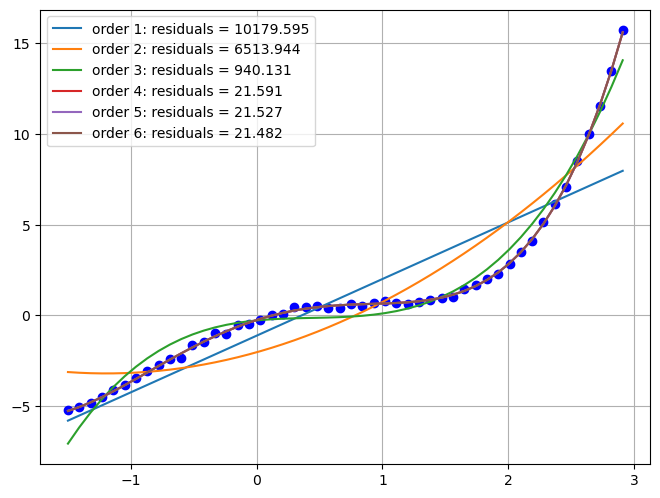

In [51]:
poly_data=np.loadtxt('poly_data.txt')
U=poly_data[:,0]
I = poly_data[:,1]
sigma_I = poly_data[:,2]

maxorder=6
fig,ax=plt.subplots(1,1, figsize=(20*cm, 15*cm))
ax.plot(U,I,'ob')
for order in range(1,maxorder+1):    
    a,C = polyfit(U,I,sigma_I, order)
    I_fit = np.zeros_like(U)
    for i in range(order,-1,-1):
        I_fit = a[i] + U*I_fit
    res = np.sum(((I - I_fit)/sigma_I)**2)
    ax.plot(U,I_fit, '-', label=f'order {order}: residuals = {np.round(res,3)}')
ax.grid()
ax.legend()